<a href="https://colab.research.google.com/github/GREESHMARAJALA/AIML/blob/main/LAB_10(12_11_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)

In [6]:
X.shape

(300, 2)

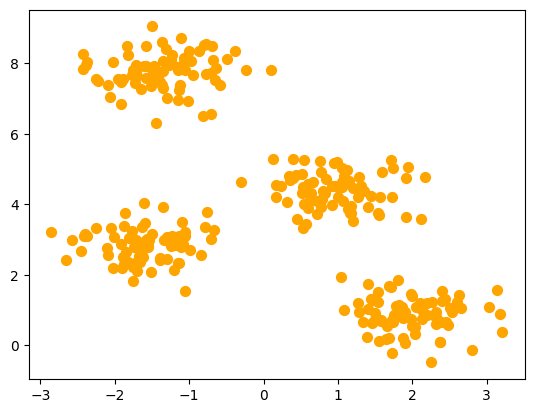

In [16]:
plt.scatter(X[:, 0], X[:, 1], s=50, color='orange')

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=4)

In [19]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [20]:
y_means_pred = kmeans.predict(X)


In [23]:
centers = kmeans.cluster_centers_
centers

array([[ 0.95415778,  4.39985544],
       [-1.35241261,  7.76731726],
       [ 1.99469693,  0.8727049 ],
       [-1.57480456,  2.84532424]])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_means_pred, y_true)

0.25

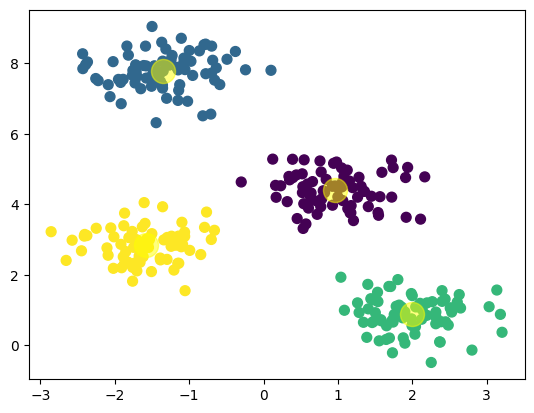

In [29]:
plt.scatter(X[:, 0], X[:,1], c=y_means_pred, s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:, 1], c='yellow',s=300, alpha=0.5)

In [30]:
from sklearn.metrics import pairwise_distances_argmin

In [36]:
def find_clusters(X, n_clusters, rseed = 2):
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]
  while True:
    lables = pairwise_distances_argmin(X, centers)
    new_centers = np.array([X[lables == i].mean(0) for i in range(n_clusters)])
    if np.all(centers == new_centers):
      break
    centers = new_centers

    return centers, lables

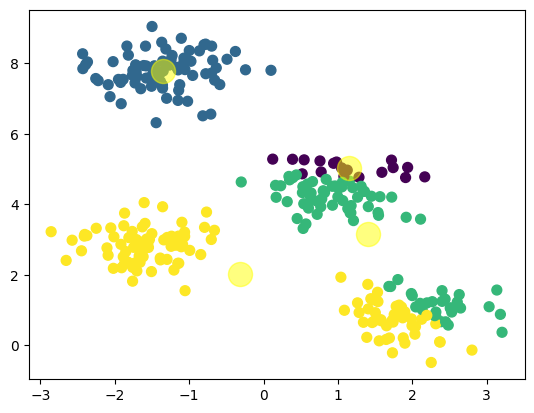

In [37]:
centers, lables = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=lables,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.5);


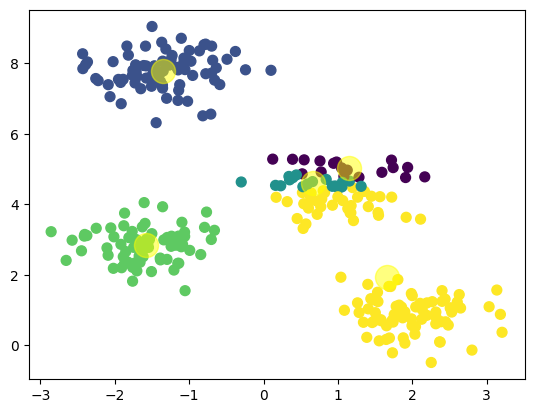

In [38]:
centers, lables = find_clusters(X, 5)
plt.scatter(X[:, 0], X[:, 1], c=lables,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.5);

In [39]:
accuracy_score(lables, y_true)

0.06

In [40]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)


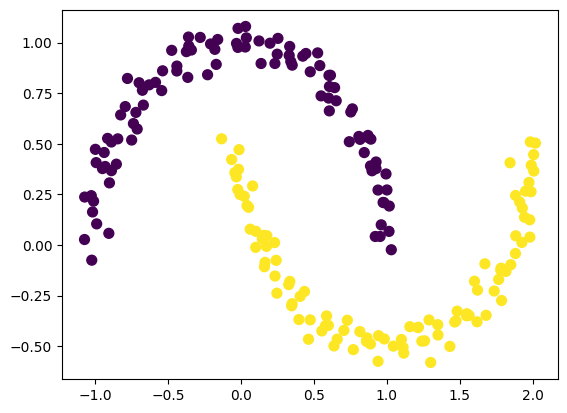

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

In [42]:

from sklearn.cluster import SpectralClustering



In [43]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
lables = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


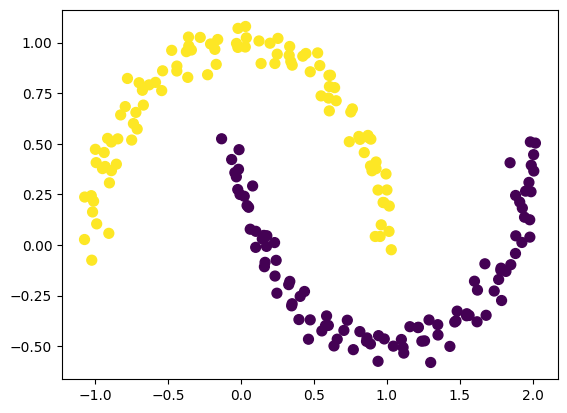

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=lables, s=50, cmap='viridis');

In [45]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.7, random_state=0)
X = X[:, ::-1]



In [46]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [50]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
  labels = kmeans.fit_predict(X)
  ax = ax or plt.gca()
  ax.axis('equal')
  ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k', zorder=2)
  centers = kmeans.cluster_centers_
  radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
  for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

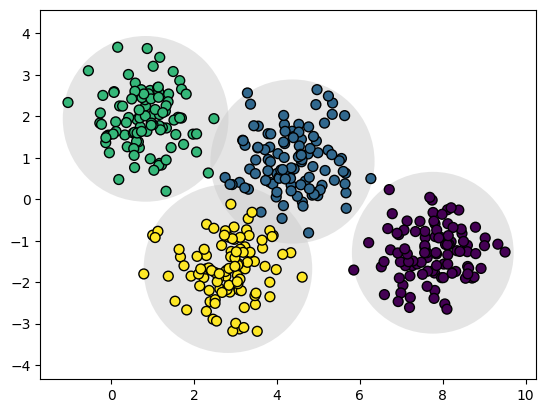

In [51]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, X)